In [1]:
from ipywidgets import widgets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [8]:
type='U'

if type is 'U':
    D = 0.13
    d_0_o = .0320
    d_0_i = .0262
    d_1_o = -1.
    d_1_i = -1.
    d_1_o = d_0_o
    d_1_i = d_0_i
    w = .085 # .06
    # alpha = 3121.6
elif type is '2U':
    D = 0.13
    d_0_o = .0320
    d_0_i = .0262
    d_1_o = d_0_o
    d_1_i = d_0_i
    #D = 0.16 #0.10 # borehole diameter (m)
    #d_o = .04 # outer pipe diameter (m)
    #d_i = .0326 # inner pipe diameter (m)
    #w = 0.098 / 1.41421356 #  0.04242
    w  = .06 # 1.41421356  ????
    # alpha = 1785.6
elif type is 'CX':
    D = 0.1
    d_0_o = 0.024
    d_0_i = 0.018
    d_1_o = 0.050
    d_1_i = 0.042

    w = 0.
    
L = 100 # pipe length (m)

lambda_f = 0.6405  # fluid heat conductivity (W/mK)
lambda_p0 = 0.3654  # - 0.38 pipe heat conductivity (W/mK)
lambda_p1 = lambda_p0
lambda_g = 2.3  #  0.8 - grout heat conductivity (W/mK)

mu_f = 0.54741e-3  # fluid viscosity (kg/ms)
rho_f = 988.1 # fluid bulk density (kg/m3)
c_f = 4180.95 # heat capacity (J/kgK)

Q = 2.53e-4 # flow rate (m3/s)  - .25 kg/s (turbulent)

N = 5 # number of elements (-)

T_s_profile = np.ones(N) * 10. # soil temperature

T_in = 80. # inlet temperture (°C)

#R_a = 0.35 # 0.291 # interner thermischer Sondenwiderstand (Km/W)
#R_b = 0.12 # 0.108 # thermischer Bohrlochwiderstand (Km/W)



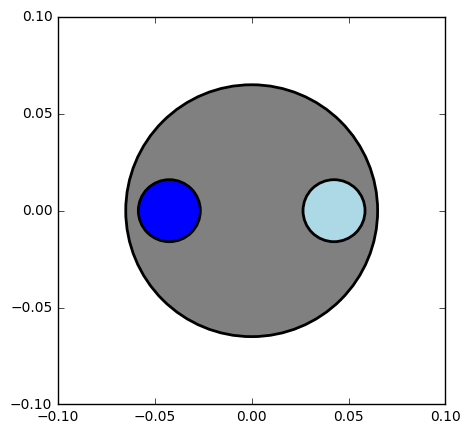

In [9]:
def draw_birdView(_D, _d_0_o, _d_1_o, _w, setting):
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    plt.subplots_adjust(wspace=.5)
    
    ax.set_xlim((-.1,.1))
    ax.set_ylim((-.1,.1))
    
    ax.add_patch(patches.Circle((0, 0), _D/2, 
                                 facecolor='grey', edgecolor='black', linewidth=2))
    
    ax.add_patch(patches.Circle((_w/2, 0), _d_1_o/2, 
                                 facecolor='lightblue', edgecolor='black', linewidth=2))
    ax.add_patch(patches.Circle((-_w/2, 0), _d_0_o/2, 
                                 facecolor='blue', edgecolor='black', linewidth=2))
    if type is '2U':
        ax.add_patch(patches.Circle((0, _w/2), -_d_1_o/2, 
                                 facecolor='lightblue', edgecolor='black', linewidth=2))
        ax.add_patch(patches.Circle((0, -_w/2), -_d_0_o/2, 
                                 facecolor='blue', edgecolor='black', linewidth=2))

draw_birdView(D, d_0_o, d_1_o, w, True)

\begin{eqnarray}
 Pr &=& \frac{\mu_f c_f}{\lambda_f} 
\end{eqnarray}

-------
 
### U

\begin{eqnarray}
   u &=& \frac{4Q}{\pi d_1^2}
\end{eqnarray}

### 2U

\begin{eqnarray}
   u &=& \frac{2Q}{\pi d_1^2}
\end{eqnarray}
 
 -------
 ### U / 2U
 
 \begin{eqnarray}
  Re &=& \frac{|u| d_1 \rho_f}{\mu_f} \\
  \xi &=& (1.8 \log_{10} (Re) - 1.5)^{-2} \\
  \gamma &=& \frac{Re - 2300}{10^4 - 2300} \qquad\qquad 0 \leq \gamma \leq 1
 \end{eqnarray}
 
-----
 \begin{eqnarray}
 Nu &=& \begin{cases}
  4.364 \qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\mbox{if $Re< 2300$} \\
    (1 - \gamma) 4.364 + \gamma \left( \frac{10^4 Pr (0.0308/8)}{1+12.7 \sqrt{0.0308/8}(Pr^{2/3}-1)} 
    \left[ 1 + \left( \frac{d_1}{L}\right)^{2/3} \right] \right)
  \qquad\mbox{if $2300 \leq Re < 10^4$} \\
  \frac{Re\,Pr (\xi/8) }{1+12.7\sqrt{\xi/8}(Pr^{2/3}-1) } \left[ 1+ \left( \frac{d_1}{L} \right)^{2/3} \right] 
  \qquad\qquad\qquad\qquad\qquad\mbox{if $Re\geq 10^4$}
 \end{cases}
 \end{eqnarray}
 
 ### CX
 
 \begin{eqnarray}
   u_{0} &=& \frac{Q}{\pi r_{0_i}^2}  \qquad\qquad\qquad\qquad
   & u_{1} = \frac{Q}{\pi (r_{1_i}^2 - r_{0_o}^2  ) } \\
      Re_{0} &=& \frac{|u| d_{0_i} \rho_f}{\mu_f} 
    &   Re_{1} = \frac{|u| d_{1} \rho_f}{\mu_f} \\
          \xi_{0} &=& (1.8 \log_{10} (Re_{0}) - 1.5)^{-2} 
      & \xi_{1} = (1.8 \log_{10} (Re_{1}) - 1.5)^{-2} \\
  \gamma_{0} &=& \frac{Re_{0} - 2300}{10^4 - 2300}  
   & \gamma_{1} = \frac{Re_{1} - 2300}{10^4 - 2300} 
\end{eqnarray}

 
  \begin{eqnarray}
 Nu_{0} &=& \begin{cases}
  4.364 \qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\mbox{if $Re_{0}< 2300$} \\
    (1 - \gamma_{0}) 4.364 + \gamma_{0} \left( \frac{10^4 Pr (0.0308/8)}{1+12.7 \sqrt{0.0308/8}(Pr^{2/3}-1)}
    \left[ 1 + \left( \frac{d_{0_i}}{L}\right)^{2/3} \right] \right)
  \qquad\mbox{if $2300 \leq Re_{0}< 10^4$} \\
  \frac{Re_{0}\,Pr (\xi_{0}/8) }{1+12.7\sqrt{\xi_{0}/8}(Pr^{2/3}-1) } \left[ 1+ \left( \frac{d_{0_i}}{L} \right)^{2/3} \right] 
  \qquad\qquad\qquad\qquad\qquad\mbox{if $Re_{0}\geq 10^4$}
 \end{cases} \\
  Nu_{1} &=& \begin{cases}
  3.66 + \left[ 4 - \frac{0.102}{\frac{d_{0_o}}{d_{1_i}} +0.02 } \right] \left(\frac{d_{0_o}}{d_{1_i}} \right)^{0.04}
  \qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\mbox{if $Re_{1}< 2300$} 
  \\
    (1 - \gamma_{1}) 
   \left(  3.66 +  \left[  4 - \frac{0.102}{\frac{d_{0_o}}{d_{1_i}} + 0.02}  \right] \left(\frac{d_{0_o}}{d_{1_i}}\right)^{0.04} \right) + \\
    \gamma_{1} \frac{ 10^4 Pr\left( 0.0308/8 \right) }{1+12.7 \sqrt{0.0308/8} (Pr^{2/3} -1) } 
  \left[ 1+ \left( \frac{d_{1}}{L} \right)^{2/3} \right] 
   \frac{0.86 \left( \frac{d_{0_o}}{d_{1_i}} \right)^{0.84} + 
  \left[ 1 - 0.14 \left( \frac{d_{0_o}}{d_{1_i}} \right)^{0.6} \right] }{
  1 + \frac{d_{0_o}}{d_{1_i}} } \qquad\mbox{if $2300 \leq Re_{1}< 10^4$}
\\
  \frac{Re_{1} Pr (\xi_{1}/8) }{1+12.7\sqrt{\xi_{1}/8}(Pr^{2/3}-1) } \left[ 1+ \left( \frac{d_{1}}{L} \right)^{2/3} \right] 
   \frac{0.86 \left( \frac{d_{0_o}}{d_{1_i}} \right)^{0.84} + 
  \left[ 1 - 0.14 \left( \frac{d_{0_o}}{d_{1_i}} \right)^{0.6} \right] }{
  1 + \frac{d_{0_o}}{d_{1_i}} } 
  \qquad\qquad\qquad\qquad\qquad\mbox{if $Re_{1}\geq 10^4$}
 \end{cases}
 \end{eqnarray}

In [10]:
 
def calculate_Re(_d, _u, _rho_f, _mu_f):
    _Re = _u * _d * _rho_f / _mu_f
    _xi = (1.8 * np.log10(_Re) - 1.5)**(-2)
    #xi = (0.79 * np.log(Re) - 1.64)**(-2)
    _gamma = (_Re - 2300.) / 7700    
    return (_Re, _xi, _gamma)


def calculate_Nu_pipe(_Re, _Pr, _d, _L, _xi, _gamma):

    if _Re < 2300:
        _Nu = 4.364
    elif _Re < 10000:
        _Nu[i] = (1 - _gamma) * 4.364 + \
        _gamma * (1 + (_d / _L)**0.66666667) * 10000 * _Pr * (0.00385) / \
        (1+12.7* np.sqrt(0.0308/8) * (_Pr**0.66666667 - 1))
        #Nu =  (1 - gamma) * 4.364 + gamma(1 + (d_i / L)**0.66666667) * 38.5 * Pr / (1 + 0.7880142765 * (Pr**0.66666667 - 1))
    else:
        _Nu = (1 + (_d / _L)**0.66666667) * _Re * _Pr * (_xi/8) / \
        (1+12.7* np.sqrt(_xi/8) * (_Pr**0.66666667 - 1))
        #Nu = (Re - 1000) * Pr * (xi/8) / (1+12.7* np.sqrt(xi/8) * (Pr**0.66666667 - 1))
    return _Nu

def calculate_Nu_ring(_Re, _Pr, _d, _d_o, _d_i, _L, _xi, _gamma):
    _d_o_d_i = _d_o / _d_i
    if _Re < 2300:
        _Nu =  (3.66 + (4. - 0.102 / (0.02 + _d_o_d_i) ) * (_d_o_d_i)**0.044)
    elif _Re < 10000:
        _Nu = (1-_gamma) * (3.66 + (4. - 0.102 / (0.02 + _d_o_d_i) ) * _d_o_d_i**0.044) + \
        _gamma * (_Pr * 38.5 / (1 + 12.7* np.sqrt(0.0308/8) * (_Pr**0.6666667 - 1))) * \
        (1 + (_d / _L)**.66667) * (0.86 * _d_o_d_i**0.84 + (1 - 0.14 * _d_o_d_i**0.6 ) ) / (1 + _d_o_d_i)
    else:
        _Nu = (_Re * _Pr * (_xi/8) / (1 + 12.7 * np.sqrt(_xi/8)* (_Pr**0.6666667 - 1))) * \
        (1 + (_d / _L)**.66667) * (0.86 * _d_o_d_i**0.84 + (1 - 0.14 * _d_o_d_i**0.6 ) ) / (1 + _d_o_d_i)
    return _Nu 
    
def calculate_flow(_d_0_o, _d_0_i, _d_1_o, _d_1_i, _w, _L, 
                   _Q, _c_f, _rho_f, _mu_f, _lambda_f):
    _Pr = _mu_f * _c_f / _lambda_f
    _A_0 = np.pi * _d_0_i * _d_0_i / 4

    if type is 'U' or type is 'CX':
        _u_0 = _Q / _A_0
    elif type is '2U':
        _u_0 = _Q / (2 * _A_0) # serial pipes

    _Re_0, _xi_0, _gamma_0 = calculate_Re(_d_0_i, _u_0, _rho_f, _mu_f)
    _Nu_0 = calculate_Nu_pipe(_Re_0, _Pr, _d_0_i, _L, _xi_0, _gamma_0)
    _A_1, _u_1, _Re_1, _Nu_1 = (None, None, None, None) # or set equal to values from _out
    #print('xi_0: {}'.format(_xi_0))
    #print('d_0_i: {}'.format(_d_0_i))

    if type is 'CX':
        _A_1 = np.pi * (d_1_i * d_1_i - d_0_o * d_0_o ) / 4
        _u_1 = Q / _A_1
        (_Re_1, _xi_1, _gamma_1) = calculate_Re(_d_1_i - _d_0_o, _u_1, _rho_f, _mu_f)
        _Nu_1 = calculate_Nu_ring(_Re_1, _Pr, _d_1_i-_d_0_o, _d_0_o, _d_1_i, _L, _xi_1, _gamma_1)

    return (_A_0, _A_1, _u_0, _u_1, _Re_0, _Re_1, _Pr, _Nu_0, _Nu_1)


A_0, A_1, u_0, u_1, Re_0, Re_1, Pr, Nu_0, Nu_1 = calculate_flow(
    d_0_o, d_0_i, d_1_o, d_1_i, w, L, Q, c_f, rho_f, mu_f, lambda_f)   
# takes not total length in Nu
           
print(type)
print('A_0: {} - A_1: {}'.format(A_0, A_1))
print('u_0: {} - u_1: {}'.format(u_0, u_1))
print('Re_0: {} - Re_1: {}'.format(Re_0, Re_1))
print('Pr: {}'.format(Pr))
print('Nu_0: {} - Nu_1: {}'.format(Nu_0, Nu_1))

U
A_0: 0.000539128715283 - A_1: None
u_0: 0.469275690254 - u_1: None
Re_0: 22193.0770537 - Re_1: None
Pr: 3.57329248946
Nu_0: 127.687722207 - Nu_1: None


### U

\begin{eqnarray}
x &=& \frac{ \ln\left( \frac{\sqrt{D^2  + 2 d_o^2} } { 2 d_o}   \right) } 
{ \ln\left( \frac{D}{\sqrt{2} d_o} \right) } 
\\
R_g &=& \frac{\arcosh\left( \frac{D^2 + d_o^2 - w^2 }{2 D d_o} \right)} {2\pi \lambda_g} \left( 1.601 - 0.888 \frac{w}{D}  \right)  \\
R_{ar} &=& \frac{\arcosh\left( \frac{2 w^2 - d_o^2}{d_o^2} \right)}{2\pi \lambda_g}
\end{eqnarray}

### 2U

\begin{eqnarray}
x &=& \frac{ \ln\left( \frac{\sqrt{D^2  + 4 d_o^2} } { 2 \sqrt{2} d_o}   \right) } 
{ \ln\left( \frac{D}{2 d_o} \right) } 
\\
R_g &=& \frac{\arcosh\left( \frac{D^2 + d_o^2 - s^2 }{2 D d_o} \right)} {2\pi \lambda_g} \left( 3.098 - 4.432 \frac{s}{D} + 2.364 \frac{s^2}{D^2} \right)  \\
R_{ar1} &=& \frac{\arcosh\left( \frac{s^2 - d_o^2}{d_o^2} \right)}{2\pi \lambda_g} \\
R_{ar2} &=& \frac{\arcosh\left( \frac{2 s^2 - d_o^2}{d_o^2} \right)}{2\pi \lambda_g}
\end{eqnarray}

### CX

\begin{eqnarray}
x &=& \frac{ \ln\left( \frac{\sqrt{D^2  + d_{1_o}^2} } {\sqrt{2} d_{1_o}}   \right) } 
{ \ln\left( \frac{D}{ d_{1_o}} \right) } \\
R_g &=& \frac{\ln\left( \frac{D}{d_{1_o}} \right) }{2 \pi \lambda_g }
\end{eqnarray}

In [11]:

def calculate_resistance_basic(_D, _d_0_o, _d_1_o, _w, _lambda_g):

    if type is 'U':
        _x = np.log(np.sqrt(_D*_D + 2*_d_0_o*_d_0_o) / \
                    (2*_d_0_o)) / np.log(_D/ (1.41421356*_d_0_o))
        _R_g = (1.601 - 0.888 * _w/_D) * \
        np.arccosh( (_D*_D + _d_0_o*_d_0_o - _w*_w) / (2*_D*_d_0_o) ) / \
        (2*np.pi * _lambda_g)
        _R_ar1 = np.arccosh( (2 * _w*_w - _d_0_o*_d_0_o) \
                            / (_d_0_o*_d_0_o) ) / (2 * np.pi * _lambda_g)
        _R_ar2 = -10000.
    elif type is '2U':
        _s = _w * 1.41421356
        _D_squared = _D * _D
        _d_squared = _d_0_o * _d_0_o
        _s_squared = _s * _s
        _x = np.log(np.sqrt(_D_squared + 4*_d_squared) / \
                    (2.8284271247461903*_d_0_o)) / np.log(_D/ (2*_d_0_o))
        _R_g = (3.098 - (4.432 * _s/_D) + 2.364 * _s_squared/(_D_squared) ) * \
        np.arccosh( (_D_squared + _d_squared - _s_squared) / \
        (2*_D*_d_0_o) ) / (2*np.pi * _lambda_g)
        _R_ar1 = np.arccosh( (_s_squared - _d_squared) / _d_squared ) / \
        (2 * np.pi * _lambda_g)
        _R_ar2 = np.arccosh( (2 * _s_squared - _d_squared) / _d_squared ) / \
        (2 * np.pi * _lambda_g)
    elif type is 'CX':
        _ln_D_d = np.log( _D / _d_1_o )
        _x = np.log(np.sqrt(_D * _D + _d_1_o * _d_1_o)  / (1.41421356 * _d_1_o)) / _ln_D_d
        _R_g = _ln_D_d / (2 * np.pi * _lambda_g)
        _R_ar1 = -1
        _R_ar2 = -1
    return (_x, _R_g, _R_ar1, _R_ar2)

x, R_g, R_ar1, R_ar2 = calculate_resistance_basic(D, d_0_o, d_1_o, w, lambda_g)

print('x: {}'.format(x))
print('R_g: {}'.format(R_g))
if type is 'U':
    print('R_ar1: {}'.format(R_ar1))
elif type is '2U':
    print('R_ar1: {}'.format(R_ar1))
    print('R_ar2: {}'.format(R_ar2))

x: 0.725763489663
R_g: 0.0521989403683
R_ar1: 0.225942330469


### U / 2U

\begin{eqnarray}
R_{adv} &=& \frac{1}{Nu\, \lambda_f\pi} \\
R_{con}^a &=& \frac{\ln(r_o / r_i)}{2 \pi \lambda_p} \\
R_{con}^b &=& x R_g
\end{eqnarray}

### CX

\begin{eqnarray}
R_{adv_{0}} &=& \frac{1}{Nu_{0}\, \lambda_f\pi} \\
R_{adv_{1}} &=& \frac{1}{Nu_{1}\, \lambda_f\pi} \frac{d_{1}}{d_{0_{o}}} \\
R_{adv_{2}} &=& \frac{1}{Nu_{1}\, \lambda_f\pi} \frac{d_{1}}{d_{1_{i}}} \\
R_{con_0}^a &=& \frac{\ln(r_{0_o} / r_{0_i})}{2 \pi \lambda_{p_0}} \\
R_{con_1}^a &=& \frac{\ln(r_{1_0} / r_{1_i})}{2 \pi \lambda_{p_b1}} \\
R_{con}^b &=& x R_g \\
d_{1} &=& d_{1_{i}} - d_{0_o}
\end{eqnarray}

In [13]:
def calculate_resistance_pipe(_d_o, _d_i, _x, _Nu, _R_g, _lambda_f, _lambda_p):
    _R_adv = 1. / (_Nu * _lambda_f * np.pi)
    _R_con_a = np.log(_d_o / _d_i) / (2*np.pi * _lambda_p)
    _R_con_b = _x * _R_g
        
    return (_R_adv, _R_con_a, _R_con_b)

def calculate_resistance_ring(_d_0_o, _d_1_o, _d_1_i, _x,  _Nu, _R_g, _lambda_f, _lambda_p):
    _d_1 = _d_1_i - _d_0_o

    _R_adv_1 = _d_1 / (_d_0_o * _Nu * _lambda_f * np.pi)  # 0o
    _R_adv_2 = _d_1 / (_d_1_i * _Nu * _lambda_f * np.pi)  # 1i
    _R_con_a = np.log(_d_1_o / _d_1_i) / (2*np.pi * _lambda_p)
    _R_con_b = _x * _R_g
    
    return (_R_adv_1, _R_adv_2, _R_con_a, _R_con_b)    
    
    
R_adv_0, R_con_0_a, R_con_b = calculate_resistance_pipe(d_0_o, d_0_i, x, Nu_0, 
                                                            R_g, lambda_f, lambda_p0)

#(R_adv_1, R_adv_2, R_con_1_a, R_con_1_b) = calculate_resistance_ring(d_0_o, d_1_o, 
#                                                                     d_1_i, x, Nu_1_arr, 
#                                                            R_g, lambda_f, lambda_p1)

#for i in range(len(Nu_0_list)):

if type is 'U' or type is '2U':
    R_adv_1 = -1
    R_adv_2 = -1
    R_con_1_a = -1
    R_con_1_b = -1
    
print('R_adv_0: {}'.format(R_adv_0))
print('R_con_0_a: {}'.format(R_con_0_a))
print('R_con_b: {}'.format(R_con_b))
if type is 'CX':
    print('R_adv_1: {}'.format(R_adv_1))
    print('R_adv_2: {}'.format(R_adv_2))
    print('R_con_1_a: {}'.format(R_con_1_a))
   

R_adv_0: 0.00389208085183
R_con_0_a: 0.0871024827837
R_con_b: 0.0378840851184


\begin{eqnarray}
R_{gs} &=& (1-x) R_g 
\end{eqnarray}

### U

\begin{eqnarray}
R_{fg} &=& R_{adv} + R_{con}^a + R_{con}^b \\
R_{gg} &=& \frac{2 R_{gs} \left( R_{ar} - 2x R_g \right)}{2 R_{gs} - R_{ar} + 2x R_g} 
\end{eqnarray}

### 2U

\begin{eqnarray}
R_{fg} &=& R_{adv} + R_{con}^a + R_{con}^b \\
R_{gg1} &=& \frac{2 R_{gs} \left( R_{ar1} - 2x R_g \right)}{2 R_{gs} - R_{ar1} + 2x R_g} \\
R_{gg2} &=& \frac{2 R_{gs} \left( R_{ar2} - 2x R_g \right)}{2 R_{gs} - R_{ar2} + 2x R_g}
\end{eqnarray}

### CX


\begin{eqnarray}
R_{ff} &=& R_{adv_{0}} + R_{adv_{1}} + R_{con_{0}}^a \\
R_{fg} &=& R_{adv_{2}} + R_{con_{1}}^a + R_{con}^b 
\end{eqnarray}

-----
## From TRT

### U

\begin{eqnarray}
R_{fg} &=& R_b \\
R_{gs} &=& R_b \\
R_{gg} &=& \frac{2R_b(R_a-2R_b)}{4R_b -R_a} 
\end{eqnarray}

-----
\begin{eqnarray}
R_{g} &=& 2R_b - R_{adv} - R_{con}^a \\
R_{ar} &=& R_a - 2(R_{adv} + R_{con}^a) \\
\end{eqnarray}

### 2U

\begin{eqnarray}
R_{fg} &=& 2R_b \\
R_{gs} &=& 2R_b \\
R_{gg1} &=& \frac{8R_b(R_a-2R_b)}{4R_b -R_a} \\
R_{gg2} &=& R_{gg1}
\end{eqnarray}

-----
\begin{eqnarray}
R_{g} &=& 4R_b - R_{adv} - R_{con}^a \\
R_{ar1} &=& \frac{(2 + \sqrt{2})R_g  (R_a - R_{adv} - R_{con}^a)}
{R_g + R_a -R_{adv} - R_{cond}^a} \\
R_{ar2} &=& \sqrt{2} R_{ar1}
\end{eqnarray}


In [16]:
def calculate_resistance(_x, _R_g, _R_ar1, _R_ar2, 
                         _R_adv_0, _R_adv_1, _R_adv_2, 
                         _R_con_0_a, _R_con_1_a, _R_con_b):

    _R_gs = (1 - _x) * _R_g # as U
    #R_ar = .226 # .187

    if type is 'U':
        _R_fg = _R_adv_0 + _R_con_0_a + _R_con_b
        _R_gg1 = 2 * _R_gs * (_R_ar1 - 2*_x*_R_g) / (2*_R_gs - _R_ar1 + 2*_x*_R_g)
        _R_gg2 = -1
        
        _R_ff = -1

        #R_fg = 0.15577
        #R_gs = 0.02574
        #R_gg = 0.11516
    elif type is '2U':
        _R_fg = _R_adv_0 + _R_con_0_a + _R_con_b # as U
        _R_gg1 = 2 * _R_gs * (_R_ar1 - 2*_x*_R_g) / (2*_R_gs - _R_ar1 + 2*_x*_R_g)
        _R_gg2 = 2 * _R_gs * (_R_ar2 - 2*_x*_R_g) / (2*_R_gs - _R_ar2 + 2*_x*_R_g)
        
        _R_ff = -1
        #R_fg = 0.14485
        #R_gs = 0.06833
        #R_gg1 = 0.00031
        #R_gg2 = 0.11776
    elif type is 'CX':
        _R_fg = R_adv_2 + R_con_1_a + R_con_b
        _R_ff = R_adv_0 + R_adv_1 + R_con_0_a
        _R_gg1 = -1
        _R_gg2 = -1

    
    return (_R_fg, _R_gs, _R_gg1, _R_gg2, _R_ff)

R_fg, R_gs, R_gg1, R_gg2, R_ff = calculate_resistance(x, R_g, R_ar1, R_ar2, 
                                                        R_adv_0, R_adv_1, R_adv_2, 
                                                        R_con_0_a, R_con_1_a, R_con_b)
#R_fg = R_b
#R_gs = R_b
#R_gg = 2 * R_b * (R_a-2*R_b) / (4*R_b - R_a)

print('R_gs: {}'.format(R_gs))

if type is 'U':
    print('R_fg: {}'.format(R_fg))
    print('R_gg1 (can be negative): {}'.format(R_gg1))
    print('constraint (should be positive): {}'.format(1/( (1/R_gg1) + (.5/R_gs)  )))
elif type is '2U':
    print('R_fg: {}'.format(R_fg))
    print('R_gg1 (can be negative): {}'.format(R_gg1))
    print('R_gg2 (can be negative): {}'.format(R_gg2))
    print('constraint (should be positive): {}'.format(1/( (1/R_gg1) + (.5/R_gs)  )))
    print('constraint (should be positive): {}'.format(1/( (1/R_gg2) + (.5/R_gs)  )))
elif type is 'CXA' or type is 'CXC':
    print('R_fg: {}'.format(R_fg))
    print('R_ff: {}'.format(R_ff))

R_gs: 0.0143148552499
R_fg: 0.128878648754
R_gg1 (can be negative): -0.0353734188724
constraint (should be positive): 0.150174160232


### U

\begin{eqnarray}
u_a &=& \frac{1}{R_{fg}} + \frac{1}{R_{gs}} + \frac{1}{R_{gg}} \\
R_1^\Delta &=& R_{fg} + R_{gs} \\
R_{12}^\Delta &=& \frac{(u_a R_{fg} R_{gg})^2 - R_{fg}^2 } {R_{gg}} 
\end{eqnarray}

### U2

\begin{eqnarray}
v &=& \frac{R_{gg1}R_{gg2}}{2(R_{gg1}+R_{gg2})} \\
u_a &=& \frac{2}{R_{fg}} + \frac{2}{R_{gs}} + \frac{1}{v} \\
R_1^\Delta &=& \frac{R_{fg} + R_{gs}}{2} \\
R_{12}^\Delta &=& \frac{ R_{fg}^2 } {4} \left( u_a^2 v - \frac{1}{v} \right)
\end{eqnarray}

### CX

\begin{eqnarray}
R_1^\Delta &=& R_{fg} + R_{gs} \\
R_{12}^\Delta &=& R_{ff}
\end{eqnarray}

In [17]:
def calculate_resistance_delta(_R_fg, _R_gs, _R_gg1, _R_gg2, _R_ff):

    if type is 'U':
        _v = -1
        _u_a = (1 / _R_fg) + (1 / _R_gs) + (1 / _R_gg1)
        _R_1_Delta = _R_fg + _R_gs
        _R_12_Delta = ( (_u_a * _R_fg * _R_gg1)*(_u_a * _R_fg * _R_gg1) -
                       _R_fg*_R_fg) /_R_gg1

        #print('u_1: {}'.format(u_1))    
    elif type is '2U':
        _v = _R_gg1 * _R_gg2 / (2*(_R_gg1 + _R_gg2))
        _u_a = (2 / _R_fg) + (2 / _R_gs) + (1 / _v)
        _R_1_Delta = (_R_fg + _R_gs) / 2
        _R_12_Delta = (_u_a * _u_a * _v - (1/_v)) * _R_fg * _R_fg / 4

        #print('v: {}'.format(v))    
        #print('u_2: {}'.format(u_2))
    elif type is 'CX':
        _R_1_Delta = _R_fg + _R_gs
        _R_12_Delta = _R_ff
        _v = -1
        _u_a = -1
    
    return (_R_1_Delta, _R_12_Delta, _u_a, _v)

R_1_Delta, R_12_Delta, u_a, v = calculate_resistance_delta(R_fg, R_gs, R_gg1, R_gg2, R_ff)

print('u_a: {}'.format(u_a))
print('v: {}'.format(v))
print('R_1_Delta: {}'.format(R_1_Delta))
print('R_12_Delta: {}'.format(R_12_Delta))

u_a: 49.3469223228
v: -1
R_1_Delta: 0.143193504004
R_12_Delta: -0.961181443593


\begin{eqnarray}
 \beta_1 &=& \frac{1}{R_1^\Delta A_0 \rho_f c_f u_0} \\
 \beta_{12} &=& \frac{1}{R_{12}^\Delta A_0 \rho_f c_f u_0}
\end{eqnarray}
### U / 2U

\begin{eqnarray}
 \gamma &=& \sqrt{\beta_1^2 + 2 \beta_{12} \beta_1} \\
 \delta &=& \frac{1}{\gamma} \left( \beta_{12} + \beta_1 \right)
\end{eqnarray}

### CX

\begin{eqnarray}
 \beta &=& -\frac{\beta_1}{2} \\
 \gamma &=& \sqrt{\frac{\beta_1^2}{4} + \beta_{12} \beta_1} \\
 \delta &=& \frac{1}{\gamma} \left( \beta_{12} + \frac{\beta_1}{2} \right)
\end{eqnarray}


In [73]:
def calculate_greeks(_A_0, _u_0, _rho_f, _c_f, _R_1_Delta, _R_12_Delta):
    _beta_1 = 1 / (_R_1_Delta * _A_0 * _rho_f * _c_f * _u_0 )
    _beta_12 = 1 / (_R_12_Delta * _A_0 * _rho_f * _c_f * _u_0 )
    if type is 'U' or type is '2U':
        _beta = -1
        _gamma = np.sqrt(_beta_1 * (_beta_1 + 2 * _beta_12))
        _delta = (_beta_1 + _beta_12) / _gamma
    elif type is 'CX':
        _beta = - _beta_1 / 2
        _gamma = np.sqrt(_beta_1 * (_beta_1 * 0.25 + 2 * _beta_12))
        _delta = (_beta_1 * 0.5 + _beta_12) / _gamma
        
    return (_beta_1, _beta_12, _beta, _gamma, _delta)

beta_1, beta_12, beta, gamma, delta = calculate_greeks(A_0, u_0, rho_f, c_f, 
                                                   R_1_Delta, R_12_Delta)

print('beta_1: {}'.format(beta_1))
print('beta_12: {}'.format(beta_12))
print('beta: {}'.format(beta))
print('gamma: {}'.format(gamma))
print('delta: {}'.format(delta))

beta_1: 0.00527096942208
beta_12: 0.000120759748487
beta: -1
gamma: 0.00539037665955
delta: 1.00025091215


### U / 2U

\begin{eqnarray}
 f_1(z) &=& \cosh(\gamma z) - \delta \sinh(\gamma z) \\
 f_2(z) &=& \frac{\beta_{12}}{\gamma} \sinh(\gamma z) \\ 
 f_3(z) &=& \cosh(\gamma z) + \delta \sinh(\gamma z) \\ 
 f_4(z) &=& \beta_1 \left[\cosh(\gamma z) - 
 \left( \delta + \frac{ \beta_{12}}{\gamma} \right) \sinh(\gamma z) \right] \\ 
 f_5(z) &=& \beta_1 \left[ \cosh(\gamma z) + 
 \left( \delta + \frac{\beta_{12}} {\gamma} \right) \sinh(\gamma z) \right]
\end{eqnarray}

### CX

\begin{eqnarray}
 f_1(z) &=& e^{\beta z} \left[\cosh(\gamma z) - \delta \sinh(\gamma z) \right] \\
 f_2(z) &=& e^{\beta z}\frac{\beta_{12}}{\gamma} \sinh(\gamma z) \\ 
 f_3(z) &=& e^{\beta z}\left[\cosh(\gamma z) + \delta \sinh(\gamma z) \right] \\ 
 f_4(z) &=& e^{\beta z}\beta_1 \left[\cosh(\gamma z) - \delta  \sinh(\gamma z) \right] \\ 
 f_5(z) &=& e^{\beta z}  \frac{\beta_1\beta_{12}}
 {\gamma} \sinh(\gamma z) 
\end{eqnarray}

In [78]:
def provide_functions(_N, _L, _beta_12, _beta, _gamma, _delta):

    _Delta_L = _L / (_N-1)
    _depth = np.arange(0, _N*_Delta_L, _Delta_L)
    _gdepth = _gamma*_depth
    
    if type is 'U' or type is '2U':
        _f1 = np.cosh(_gdepth) - _delta * np.sinh(_gdepth)
        _f2 = np.sinh(_gdepth) * _beta_12 / _gamma
        _f3 = np.cosh(_gdepth) + _delta * np.sinh(_gdepth)
    elif type is 'CX':
        _exp = np.exp(_beta * _depth)
        _f1 = _exp * (np.cosh(_gdepth) - _delta * np.sinh(_gdepth))
        _f2 = _exp * np.sinh(_gdepth) * _beta_12 / _gamma
        _f3 = _exp * np.cosh(_gdepth) + _delta * np.sinh(_gdepth)
    #f4 = beta_1 * (np.cosh(gdepth) - delta - np.sinh(gdepth) * beta_12 / gamma)
    #f5 = beta_1 * (np.cosh(gdepth) + delta + np.sinh(gdepth) * beta_12 / gamma)

    return (_f1, _f2, _f3, _Delta_L, _depth)

(f1, f2, f3, Delta_L, depth) = provide_functions(
    N, L, beta_12, beta, gamma, delta)

#####
def F4(_z, _a, _b, _beta_1, _beta_12, _beta, _gamma, _delta):
    if type is 'U' or type is '2U':
        return ((-np.sinh(_gamma*(_z-_b)) + np.sinh(_gamma*(_z-_a))) * _beta_1 + \
            (np.cosh(_gamma*(_z-_b)) - np.cosh(_gamma*(_z-_a)) )* \
            (_delta*_beta_1 + _beta_1 * _beta_12/_gamma) )/ _gamma
    elif type is 'CX':
        _exp = ( np.exp(_beta * (_z-_b)) - np.exp(_beta * (_z-_a)) ) * \
        _beta_1 / (_gamma * _gamma - _beta * _beta)
        _factor = (_gamma * _delta + _beta) * \
        ( np.cosh(_gamma*(_z-_b)) - np.cosh(_gamma*(_z-_a)))- \
        (_gamma + _delta * _beta ) * ( np.sinh(_gamma*(_z-_b)) - np.sinh(_gamma*(_z-_a)) )
        return _exp * _factor

    
def F5(_z, _a, _b, _beta_1, _beta_12, _beta, _gamma, _delta):
    if type is 'U' or type is '2U':
        return ((-np.sinh(_gamma*(_z-_b)) + np.sinh(_gamma*(_z-_a))) * _beta_1 - \
            (np.cosh(_gamma*(_z-_b)) - np.cosh(_gamma*(_z-_a)) )* \
            (_delta*_beta_1 + _beta_1 * _beta_12/_gamma) )/ _gamma
    elif type is 'CX':
        _exp = ( np.exp(_beta * (_z-_b)) - np.exp(_beta * (_z-_a)) ) * \
        _beta_1 * _beta_12 / (_gamma * _gamma - _beta * _beta)
        _factor = ( ( np.sinh(_gamma*(_z-_b)) - np.sinh(_gamma*(_z-_a)) ) * _beta / _gamma -
                  (  np.cosh(_gamma*(_z-_b)) - np.cosh(_gamma*(_z-_a)) ) )
        return _exp * _factor





\begin{eqnarray}
T_o(t) &=& T_i(t) \frac{f_1(L) + f_2(L)}{f_3(L) - f_2(L)} + 
\int_0^L \frac{T_s(\xi, t) \left[ f_4(L-\xi) + f_5(L-\xi) \right]}{f_3(L) - f_2(L)} \,d\xi \\
T_i(z, t) &=& T_i(t) f_1(z) + T_o(t) f_2(z) + \int_0^z T_s(\xi, t) f_4(z-\xi)\, d\xi \\
T_o(z, t) &=& -T_i(t) f_2(z) + T_o(t) f_3(z) - \int_0^z T_s(\xi, t) f_5(z-\xi)\, d\xi
\end{eqnarray}

### U

\begin{eqnarray}
T_{gi}(z, t) &=&  \frac{\left[ \frac{T_s(z, t)}{R_{gs}} + \frac{T_o(z, t)}{R_{fg}} + 
\left( \frac{T_s(z, t)}{R_{gs}} + \frac{T_i(z, t)}{R_{fg}}  \right) u_a R_{gg}  \right] R_{gg}}{R_{gg}^2 u_a^2 - 1} \\
T_{go}(z, t) &=& \left( \frac{T_{g1}(z, t)}{R_{gg}} + \frac{T_{o}(z, t)}{R_{fg}} + \frac{T_{s}(z, t)}{R_{gs}} \right) \frac{1}{u_a}
\end{eqnarray}

### 2U

\begin{eqnarray}
T_{gi}(z, t) &=&  \left[ \frac{2T_s(z, t)}{R_{gs}} + \frac{2T_o(z, t)}{R_{fg}} + 
\left( \frac{2T_s(z, t)}{R_{gs}} + \frac{2T_i(z, t)}{R_{fg}}  \right) u_a v \right]
 \frac{v}{v^2 u_a^2 -1}  \\
T_{go}(z, t) &=& \left( \frac{T_{g1}(z, t)}{v} + \frac{2T_{o}(z, t)}{R_{fg}} + \frac{2T_{s}(z, t)}{R_{gs}} \right) \frac{1}{u_a}
\end{eqnarray}

### CX

\begin{eqnarray}
T_{g}(z, t) &=&  \frac{R_{fg}}{ R_{fg} + R_{gs} } \left[  T_s(z, t) - T_i(z, t) \right] + T_i(z, t)
\end{eqnarray}

In [75]:
def calculate_temperatures(_f1, _f2, _f3, _N, _L, _Delta_L, _T_in, _T_s_profile, 
                           _R_fg, _R_gs, _R_gg1, _R_gg2, _v, _u_a, 
                           _beta_1, _beta_12, _beta, _gamma, _delta):

    
    _T_out = _T_in * (_f1[_N-1] + _f2[_N-1])
    z  = 0.
    for i in range(0, _N-1):
        _T_out += (F4(_L, z, z+_Delta_L, _beta_1, _beta_12, _beta, _gamma, _delta) + \
                F5(_L, z, z+_Delta_L, _beta_1, _beta_12, _beta, _gamma, _delta) ) * \
                    (_T_s_profile[i] + _T_s_profile[i+1]) / 2
        z += _Delta_L
    _T_out /= (_f3[_N-1] - _f2[_N-1])

    _T_in_profile = np.empty(_N)
    _T_out_profile = np.empty(_N)
    _T_in_profile = _T_in * _f1 + _T_out * _f2
    _T_out_profile = -_T_in * _f2 + _T_out * _f3

    z = 0.
    for i in range(1, _N):
        z2 = 0.
        for j in range(i):
            _T_in_profile[i] += F4(z, z2, z2+_Delta_L, _beta_1, _beta_12, _beta, _gamma, _delta) * \
                                (_T_s_profile[j-1] + _T_s_profile[j]) / 2
            _T_out_profile[i] -= F5(z, z2, z2+_Delta_L, _beta_1, _beta_12, _beta, _gamma, _delta) * \
                                (_T_s_profile[j-1] + _T_s_profile[j]) / 2
            z2 += _Delta_L
        z += _Delta_L

    if type is 'U':
        _T_gin_profile = ((_T_s_profile / _R_gs) +  (_T_out_profile / _R_fg) +  \
                         ( (_T_s_profile/_R_gs) + 
                          (_T_in_profile / _R_fg) ) * _u_a * _R_gg1 ) * _R_gg1 / \
            ( _R_gg1 * _R_gg1 * _u_a * _u_a -1)
        _T_gout_profile = ((_T_gin_profile / _R_gg1) +  (_T_out_profile / _R_fg) + \
                         (_T_s_profile / _R_gs)) / _u_a
    elif type is '2U':
        _T_gin_profile = ((_T_s_profile / _R_gs) +  (_T_out_profile /_R_fg) +  \
                         ( (_T_s_profile/_R_gs) + (_T_in_profile / _R_fg) ) * _u_a * _v ) * 2 * _v / \
                ( _v*_v * _u_1 * _u_1 -1 )
        _T_gout_profile = ((_T_gin_profile / _v) +  (2*_T_out_profile / _R_fg) + \
                         (2*_T_s_profile / _R_gs)) / _u_a
    
    elif type is 'CX':
        _T_gout_profile = _T_in_profile + (_T_s_profile - _T_in_profile) * _R_fg / (_R_fg + _R_gs)
        _T_gin_profile = _T_gout_profile
    return (_T_in_profile, _T_out_profile, _T_gin_profile, _T_gout_profile)


(T_in_profile, T_out_profile, T_gin_profile, T_gout_profile) = \
calculate_temperatures(f1, f2, f3, N, L, Delta_L, 
                       T_in, T_s_profile, 
                       R_fg, R_gs, R_gg1, R_gg2, v, u_a, \
                       beta_1, beta_12, beta, gamma, delta)


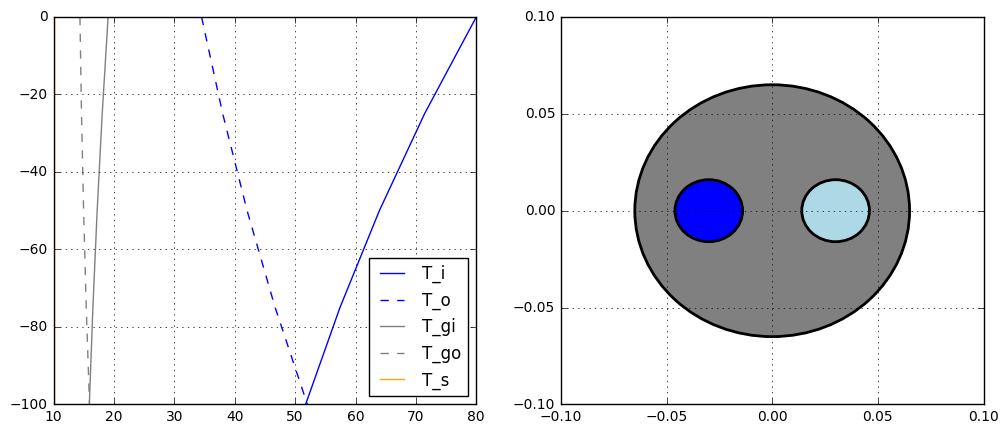

In [76]:
def do_plot(_T_in_profile, _T_out_profile, _T_gin_profile, _T_gout_profile, _T_s_profile, _D, 
            _d_0_o, _d_1_o, _w, _depth_lst_arr, setting):
    plt.figure(1, figsize=(12, 5))

    #ax = plt.subplot(121)
    #fig, axes = plt.subplots(1, 2, figsize=(12,5))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    
    ax1.plot(_T_in_profile, -_depth_lst_arr, label='T_i', color='b')
    ax1.plot(_T_out_profile, -_depth_lst_arr, label='T_o', color='b', linestyle='--')

    ax1.plot(_T_gin_profile, -_depth_lst_arr, label='T_gi', color='grey')
    ax1.plot(_T_gout_profile, -_depth_lst_arr, label='T_go', color='grey', linestyle='--')

    ax1.plot(_T_s_profile, -_depth_lst_arr, label='T_s', color='orange')
    
    ax1.grid(True)
    ax1.legend(loc='lower right')
    
    pipe_color = 'blue' if setting else 'red'

    #ax = plt.subplot(122)
    #plt.subplots_adjust(wspace=.5)
    
    ax2.set_xlim((-.1,.1))
    ax2.set_ylim((-.1,.1))
    ax2.grid(True)
    
    ax2.add_patch(patches.Circle((0, 0), _D/2, 
                                 facecolor='grey', edgecolor='black', linewidth=2))
    
    ax2.add_patch(patches.Circle((_w/2, 0), _d_1_o/2, 
                                 facecolor='lightblue', edgecolor='black', linewidth=2))
    ax2.add_patch(patches.Circle((-_w/2, 0), _d_0_o/2, 
                                 facecolor='blue', edgecolor='black', linewidth=2))
    if type is '2U':
        ax2.add_patch(patches.Circle((0, _w/2), -_d_1_o/2, 
                                 facecolor='lightblue', edgecolor='black', linewidth=2))
        ax2.add_patch(patches.Circle((0, -_w/2), -_d_0_o/2, 
                                 facecolor='blue', edgecolor='black', linewidth=2))
    
    
do_plot(T_in_profile, T_out_profile, T_gin_profile, T_gout_profile, T_s_profile, D, 
        d_0_o, d_1_o, w, depth, True)

In [77]:
def calculate(_D, _w, _d_0_o, _d_1_o, _b, _Q, _lambda_g):
    _d_0_i = _d_0_o - 2*_b
    _d_1_i = _d_1_o - 2*_b
    
    (_A_0, _A_1, _u_0, _u_1, _Re_0, _Re_1, _Pr, _Nu_0, _Nu_1) = calculate_flow(_d_0_o, _d_0_i, 
                                                                      _d_1_o, _d_1_i, 
                                                                      _w, L, _Q, 
                                                             c_f, rho_f, mu_f, lambda_f)
    (_x, _R_g, _R_ar1, _R_ar2) = calculate_resistance_basic(_D, _d_0_o, _d_1_o, _w, _lambda_g)
    (_R_adv_0, _R_con_0_a, _R_con_0_b) = calculate_resistance_pipe(_d_0_o, _d_0_i, _x, 
                                                                      _Nu_0, _R_g, 
                                                                      lambda_f, lambda_p0)
    (_R_adv_1, _R_adv_2, _R_con_1_a, _R_con_1_b) = calculate_resistance_ring(_d_0_o, _d_1_o, 
                                                                     _d_1_i, _x, _Nu_1, 
                                                            _R_g, lambda_f, lambda_p1)
    (_R_fg, _R_gs, _R_gg1, _R_gg2, _R_ff) = calculate_resistance(_x, _R_g, _R_ar1, _R_ar2, 
                                                            _R_adv_0, _R_adv_1, _R_adv_2, 
                                                            _R_con_0_a, _R_con_1_a, _R_con_0_b)
    (_R_1_Delta, _R_12_Delta, _u_a, _v) = calculate_resistance_delta(_R_fg, _R_gs, 
                                                                     _R_gg1, _R_gg2, _R_ff)
    (_beta_1, _beta_12, _beta, _gamma, _delta) = calculate_greeks(_A_0, _u_0, 
                                                                           rho_f, c_f, 
                                                                           _R_1_Delta, 
                                                                           _R_12_Delta)
    (_f1, _f2, _f3, _Delta_L, _depth) = provide_functions(N, L, _beta_12, _beta, 
                                                          _gamma, _delta)
    (_T_out_profile, _T_in_profile, _T_gout_profile, _T_gin_profile) = calculate_temperatures(
        _f1, _f2, _f3, N, L, _Delta_L, T_in, T_s_profile, _R_fg, _R_gs, _R_gg1, _R_gg2, 
        _v, _u_a, _beta_1, _beta_12, _beta, _gamma, _delta)
    
    print('x:     {0:3.4f}   R_adv_0:   {1:3.4f}   R_fg:  {2:3.4f}   beta_1:  {3:3.4f}   u_0:  {4:3.4f}'.format(
        _x, _R_adv_0, _R_fg, _beta_1, _u_0))
    print('R_g:   {0:3.4f}   R_con_0_a: {1:3.4f}   R_gs:  {2:3.4f}   beta_12: {3:3.4f}   Re_0:  {4:3.4f}'.format(
        _R_g, _R_con_0_a,  _R_gs, _beta_12, _Re_0))
    print('R_ar1: {0:3.4f}   R_con_0_b: {1:3.4f}   R_gg1: {2:3.4f}   gamma:  {3:3.4f}    Pr:  {4:3.4f}'.format(
        _R_ar1, _R_con_0_b, _R_gg1, _gamma, _Pr))
    print('R_ar2: {0:3.4f}                     R_gg2: {1:3.4f}   delta:  {2:3.4f}   Nu_out:  {3:3.4f}'.format(
        _R_ar2, _R_gg2, _delta, _Nu_0))
    print('T_in:  {0:3.4f}  T_g1: {1:3.4f} '.format(_T_in_profile[0], _T_gin_profile[0]))
    print('T_out: {0:3.4f}  T_g0: {1:3.4f} '.format(_T_out_profile[0], _T_gout_profile[0]))

    _setup = _w+ _d_1_o < _D and _d_1_o < _w if type is 'U' or type is '2U' else True
    _constraint1 = 1/( (1/_R_gg1) + (.5/_R_gs))
    _constraint2 = 1/( (1/_R_gg2) + (.5/_R_gs))
    print('Setup: {0}  Constraint1: {1:3.4f}  Constraint 2: {2:3.4f}'.format(
       _setup, _constraint1, _constraint2))
    
    do_plot(_T_out_profile, _T_in_profile, _T_gout_profile, _T_gin_profile, 
            T_s_profile, _D, _d_0_o, _d_1_o, _w, 
            _setup and _constraint1 > 0 and _constraint2 > 0)

widget_return = widgets.interact(calculate, 
                                 # borehole diameter
                                 _D=widgets.FloatSlider(value=D, min=.05, max=.2, 
                                              step=0.001, readout_format='.3f'),
                                 _w=widgets.FloatSlider(value=w, min=.0, max=.1, 
                                              step=0.001, readout_format='.3f'),
                                 _d_0_o=widgets.FloatSlider(value=d_0_o, min=.001, max=.05, 
                                              step=0.001, readout_format='.3f'),
                                 _d_1_o=widgets.FloatSlider(value=d_1_o, min=.001, max=.05, 
                                              step=0.001, readout_format='.3f'),
                                 _b=widgets.FloatSlider(value=(d_0_o-d_0_i)/2, 
                                                        min=.001, max=.01, 
                                              step=0.001, readout_format='.3f'),
                                 _Q=widgets.FloatSlider(value=Q, min=1.e-6, max=1.e-3, 
                                              step=1.e-6, readout_format='.6f'),
                                 _lambda_g=widgets.FloatSlider(value=lambda_g, 
                                                               min=.5, max=4., 
                                              step=0.001, readout_format='.3f')
       
                                )

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'